In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
book_sales = pd.read_csv(
    'ts-course-data/book_sales.csv',
    index_col = 'Date',
    parse_dates=['Date'],

).drop('Paperback', axis=1)
book_sales['Time'] = np.arange(len(book_sales.index))
book_sales['Lag_1'] = book_sales['Hardcover'].shift(1)
book_sales = book_sales.reindex(columns=['Hardcover', 'Time', 'Lag_1'])

ar = pd.read_csv('ts-course-data/ar.csv')

dtype = {
    'store_nbr' : 'category',
    'family' : 'category',
    'sales' : 'float32' ,
    'onpromotion' : 'uint64',
}
store_sales = pd.read_csv(
    'store-sales-time-series-forecasting/train.csv',
    dtype=dtype,
    parse_dates=['date'],
    infer_datetime_format=True,
)
store_sales = store_sales.set_index('date').to_period('D')
store_sales = store_sales.set_index(['store_nbr', 'family'], append=True)
average_sales = store_sales.groupby('date').mean()['sales']

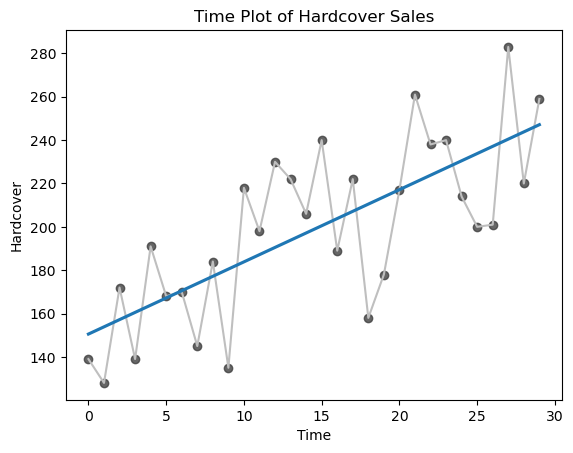

In [4]:
fig , ax = plt.subplots()
ax.plot('Time', 'Hardcover', data=book_sales, color='0.75')
ax = sns.regplot(x='Time', y='Hardcover', data=book_sales, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Hardcover Sales');

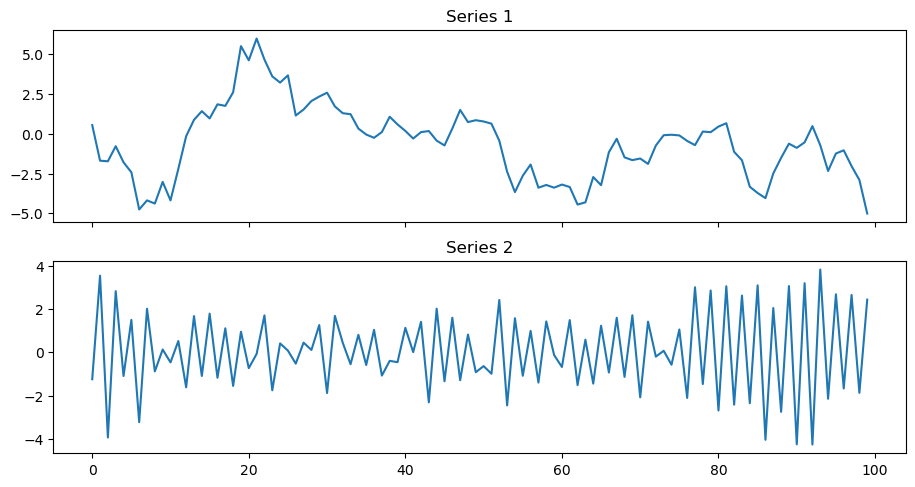

In [5]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(11,5.5), sharex=True)
ax1.plot(ar['ar1'])
ax1.set_title('Series 1')
ax2.plot(ar['ar2'])
ax2.set_title('Series 2');

In [6]:
df = average_sales.to_frame()

# Create a time dummy
time = np.arange(len(df.index))

df['time'] = time

# Create training data
X = df.loc[:,['time']] # features
y = df.loc[:,'sales']  # target

# Train the model
model = LinearRegression()
model.fit(X,y)

# Store the fitted values as a time series with the same time index
# as the training data
y_pred = pd.Series(model.predict(X), index=X.index)

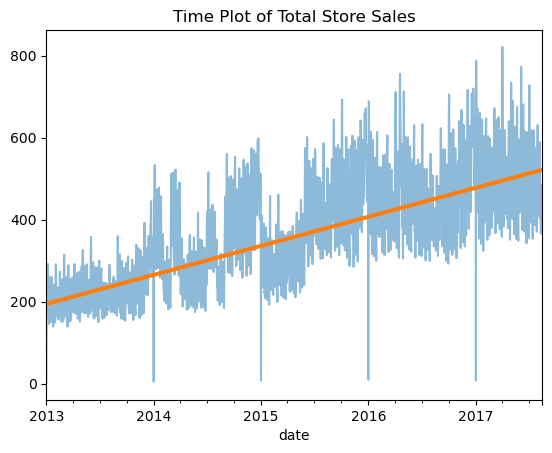

In [8]:
ax = y.plot(alpha=0.5)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Total Store Sales');